# Introduction tpo nueral network classification with TensorFlow

In this notebook, we're going to learn how to write nueral networks for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems are :

* Binary classification
* Multiclass classification
* Multiulabel classification

## Creating data to View and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#Create circles

X, Y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Checkout the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":Y})
circles


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


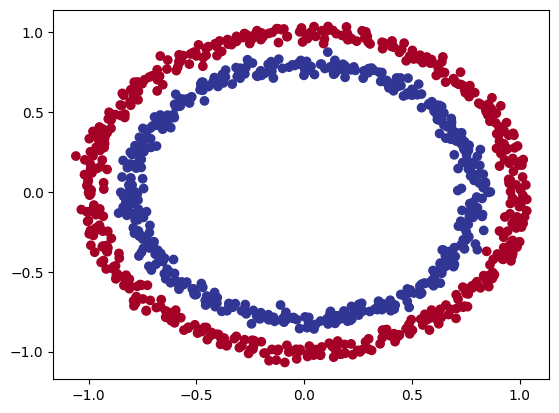

In [5]:
# Visualize a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],c=Y, cmap=plt.cm.RdYlBu)

## Input and putput shapes

In [6]:
# Check the shape of our features and labels
X.shape, Y.shape

((1000, 2), (1000,))

## Steps in the modelling

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate ...

In [7]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [8]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create  a model using sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X,Y,  epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 5.4118 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.1659 - accuracy: 0.4610
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.6513 - accuracy: 0.4500
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 2.4692 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7537 - accuracy: 0.4940


In [9]:
# Let's try and improve our model by training longer
model_1.fit(X,Y, epochs=200)
model_1.evaluate(X,Y)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7125 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.4950
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.4890
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.4870
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4940
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5050
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4960
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.4820
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4740
Epoch 11/

[0.6934831142425537, 0.5]

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                  optimizer =tf.keras.optimizers.SGD(),
                  metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X,Y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 1.6216 - accuracy: 0.4620
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4890
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4850
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4680
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4780
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4890
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4980
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4820
Epoch 11/

In [11]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934641003608704, 0.5]

## Improving our model

Let's look into bag of tricks to see how we can improve our model.

1. Creating a model - we might to add more layers or increase the no.of hidden layers.
2. Compiling a model - here we might to choose a different optimization function
3. Fitting the model - training for longer


In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X,Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.8336 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7153 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5200
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5020
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4820
Epoch 11/

In [13]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5070


[0.7011257410049438, 0.5070000290870667]

In [14]:
model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[0.48089403],
       [0.5763345 ],
       [0.58163023],
       [0.5884616 ],
       [0.42582452],
       [0.5930835 ],
       [0.5705499 ],
       [0.47411245],
       [0.47354096],
       [0.5924112 ],
       [0.5218575 ],
       [0.53445816],
       [0.57937604],
       [0.44426382],
       [0.43605322],
       [0.45159   ],
       [0.554985  ],
       [0.4551385 ],
       [0.56337714],
       [0.50829536],
       [0.5040883 ],
       [0.6105188 ],
       [0.45002997],
       [0.48501253],
       [0.6069714 ],
       [0.59149694],
       [0.5623933 ],
       [0.4502117 ],
       [0.44686735],
       [0.44046956],
       [0.4758035 ],
       [0.5973276 ],
       [0.5677489 ],
       [0.4494465 ],
       [0.44977224],
       [0.6144066 ],
       [0.59187275],
       [0.5337759 ],
       [0.4479981 ],
       [0.5090595 ],
       [0.5033718 ],
       [0.55452013],
       [0.5175543 ],
       [0.44380987],
       [0.53210425],
       [0.5527832 ],
       [0.43450022],
       [0.552

To visualize our model predictions let's create a function `plot_decision_boundary()`.

* Take in trained model, features (X) and labels (Y)
* Craete a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between Zones (Where each unique class falls)

In [15]:
import numpy as np

In [16]:
import numpy as np
def plot_decision_boundary(model, X, Y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. cs231n - nueral-networks case study
  2. made with ml
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot te decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:, 1],c=Y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


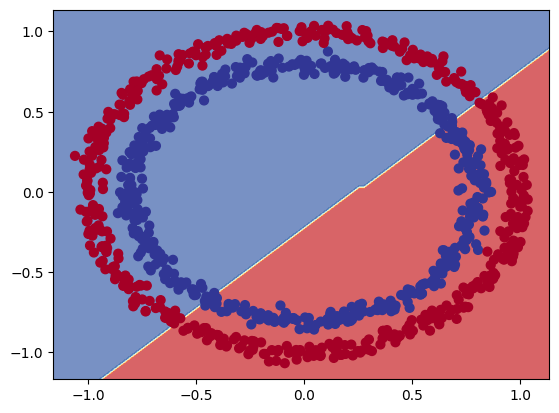

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, Y=Y)

In [18]:
# Let's see if our model can be used for regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x + 100

# Split our regression data into training and test sets
x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

"""# Fit our model to the regression data
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)"""

'# Fit our model to the regression data\nmodel_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)'

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 472.9934 - mae: 472.9934
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 352.4607 - mae: 352.4607
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 238.0032 - mae: 238.0032
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 120.5748 - mae: 120.5748
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 50.1735 - mae: 50.1735
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 82.9998 - mae: 82.9998
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 69.4741 - mae: 69.4741
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6912 - mae: 43.6912
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.6635 - mae: 49.6635
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.7521 - mae: 41.7521
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 7ms/step


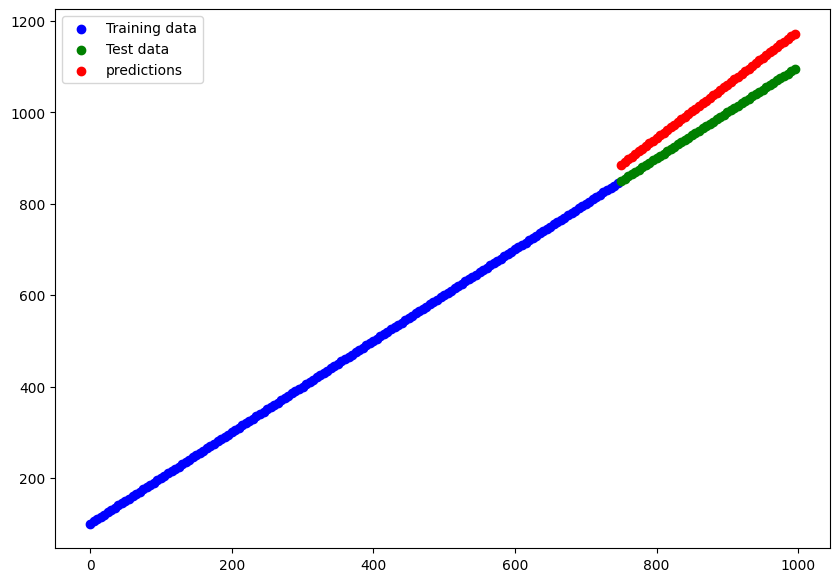

In [20]:
# Make predictions with trained model
y_reg_preds = model_3.predict(x_reg_test)

# Plot the model's prediction with the regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend()

## The missing piece: Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1.  Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
])

# 2.compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.8565 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6490 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6377 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5742 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5267 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4974 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4904 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4848 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4808 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4773 - accuracy: 0.4680
Epoch 11/

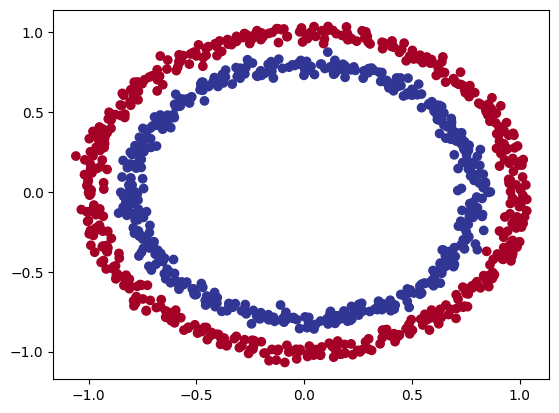

In [22]:
# Checkout our data
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


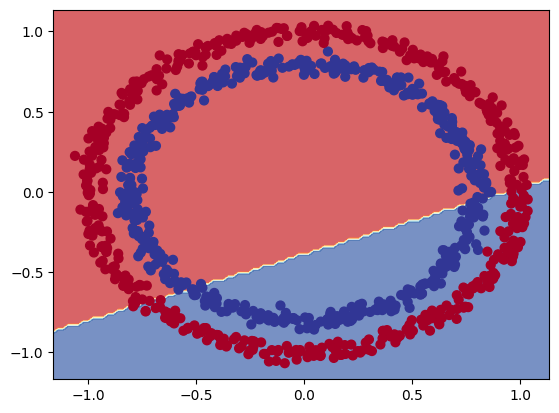

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, Y=Y)

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1.  Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
])

# 2.compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3598 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1414 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9449 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7837 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7527 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7395 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7260 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6876 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6482 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6269 - accuracy: 0.5000
Epoch 11/

In [25]:
# T9ime to replicate the multi-layer neural network from Tensorflow playground in the code

# Seup the random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1,activation="relu")
    ])

#2. Compile thew model
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,Y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [26]:
model_6.evaluate(X,Y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


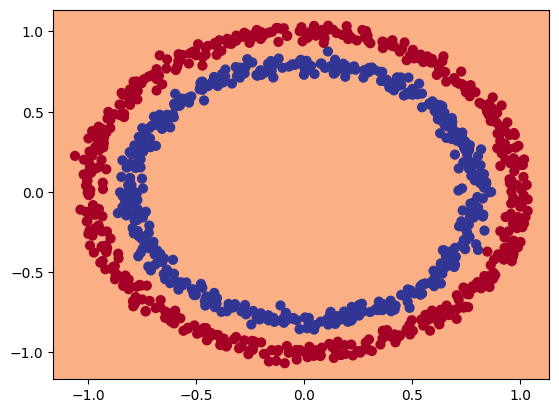

In [27]:
plot_decision_boundary(model=model_6,X=X,Y=Y)

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Craeet a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3.Fit the model
history = model_7.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5200
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5220
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5250
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5460
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5390
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5420
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5410
Epoch 11/

In [29]:
# Evaluate the model
model_7.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9960


[0.19136129319667816, 0.9959999918937683]

313/313 [==============================] - 1s 2ms/step
doing binary classification


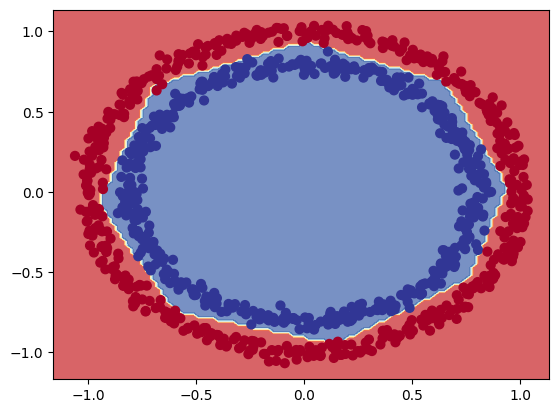

In [30]:
# Let's visualize
plot_decision_boundary(model=model_7,X=X,Y=Y)

In [31]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

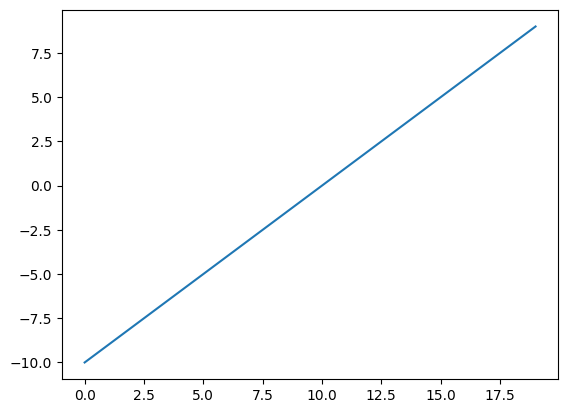

In [32]:
# Visualize our toy tensor
plt.plot(A)

In [33]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(X):
  return  1 / (1 + tf.exp(-X))

# Use the sigmoid functuon on our toy function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

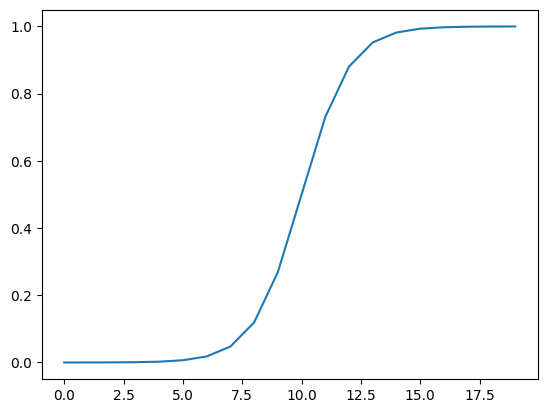

In [34]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [35]:
# Let's recreate relu function
def relu(X):
  return tf.maximum(0,X)

# Let' pass our toy function to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

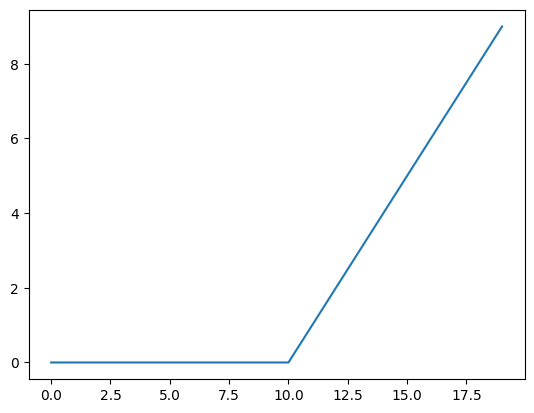

In [36]:
# plot our toy function transformed by relu function
plt.plot(relu(A))

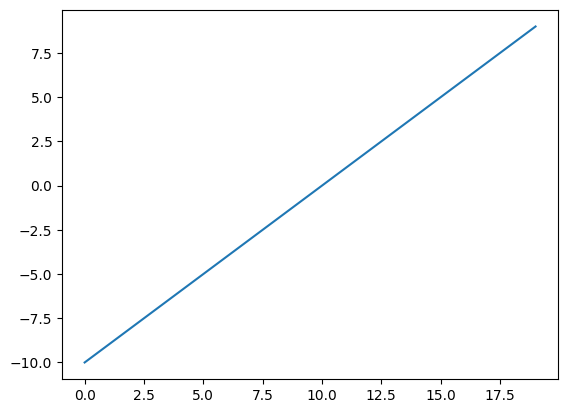

In [37]:
plt.plot(A)

In [38]:
# Let's try Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

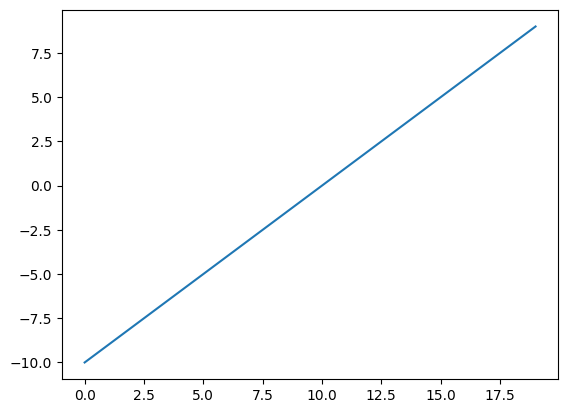

In [39]:
# Plot the toy tensor transformed by linear activation
plt.plot(tf.keras.activations.linear(A))

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification functions

So far we've been training and testing on the same datasets...

However in machine learning this is basically sin.

So, let's create training and test data

In [41]:
# Split into train and test sets
x_train, y_train = X[:800], Y[:800]
x_test, y_test = X[800:], Y[800:]

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Let's recreate the model to fit on training data and evaluate on tets data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7142 - accuracy: 0.4812
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4500
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4775
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4963
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5188
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5263
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5362
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5688
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5863
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6037
Epoch 11/25
25/25 [

In [44]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.1422 - accuracy: 0.9850


[0.1422082483768463, 0.9850000143051147]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


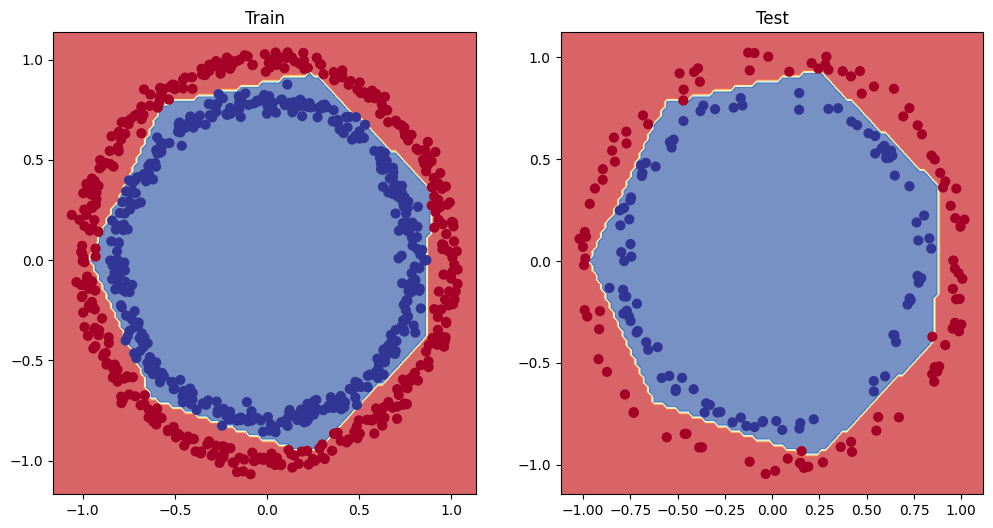

In [45]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=x_train, Y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=x_test, Y=y_test)

## Plot the loss (or training) curves

In [46]:
# Convert the history object into dataframe
H = pd.DataFrame(history.history)

In [47]:
H

,loss,accuracy
0,0.714182,0.48125
1,0.698593,0.45000
2,0.694042,0.47750
3,0.691209,0.49625
4,0.688952,0.51875
5,0.686909,0.52625
6,0.683246,0.53625
7,0.679532,0.56875
8,0.670881,0.58625
9,0.655490,0.60375


Text(0.5, 1.0, 'Model_8 loss curves')

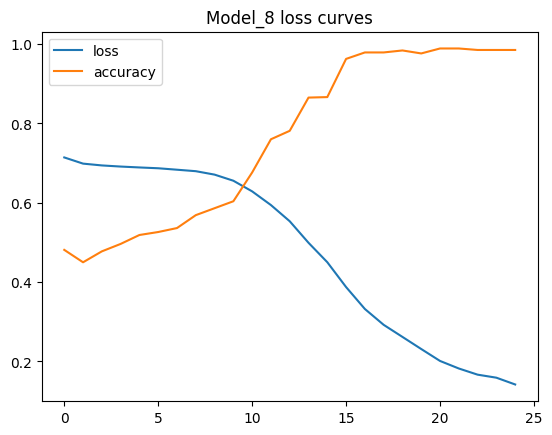

In [48]:
# plot the loss curves
H.plot()
plt.title("Model_8 loss curves")

## Finding best learning rate

To find ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **Callback** - you can think of a callback as a extra piece of functionality, you can add to your model while training
* Another model (we could use same one as above, but we're practicing building models here)
* A modified loss curve plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(x_train,y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7040 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='epochs'>

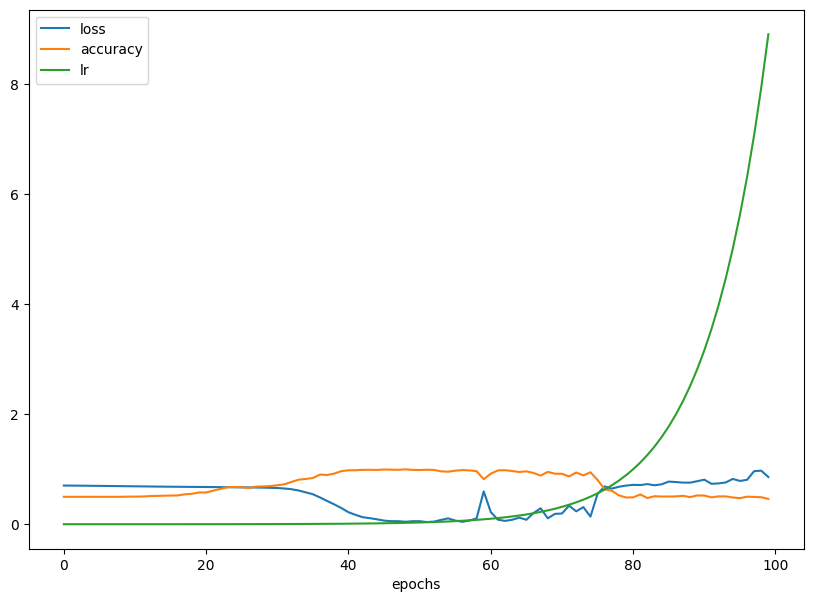

In [50]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate Vs Loss')

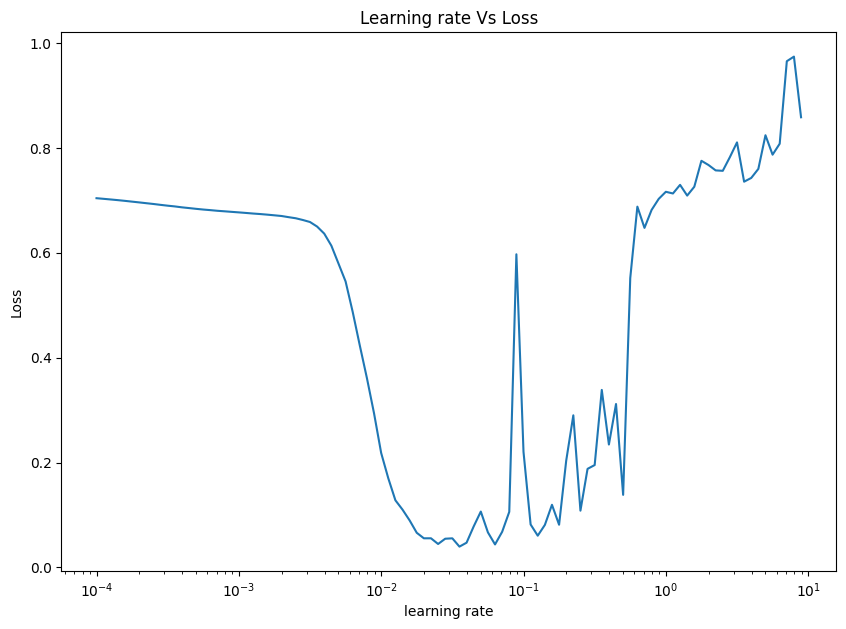

In [51]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate Vs Loss")

In [52]:
# Examples of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
pd.DataFrame(history_9.history)


,loss,accuracy,lr
0,0.703954,0.49875,0.000100
1,0.702757,0.49875,0.000112
2,0.701524,0.49875,0.000126
3,0.700258,0.49875,0.000141
4,0.698875,0.49875,0.000158
...,...,...,...
95,0.786959,0.47375,5.623413
96,0.807820,0.50125,6.309574
97,0.965143,0.49625,7.079458
98,0.973900,0.49125,7.943282


In [54]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history=model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.4437
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5362
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5838
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.5950
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6212
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6725
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7350
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7500
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.8288
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [55]:
# Evaluate the model_10
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9850


[0.0519995354115963, 0.9850000143051147]

In [56]:
# Evaluate the model_8
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9850


[0.1422082483768463, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


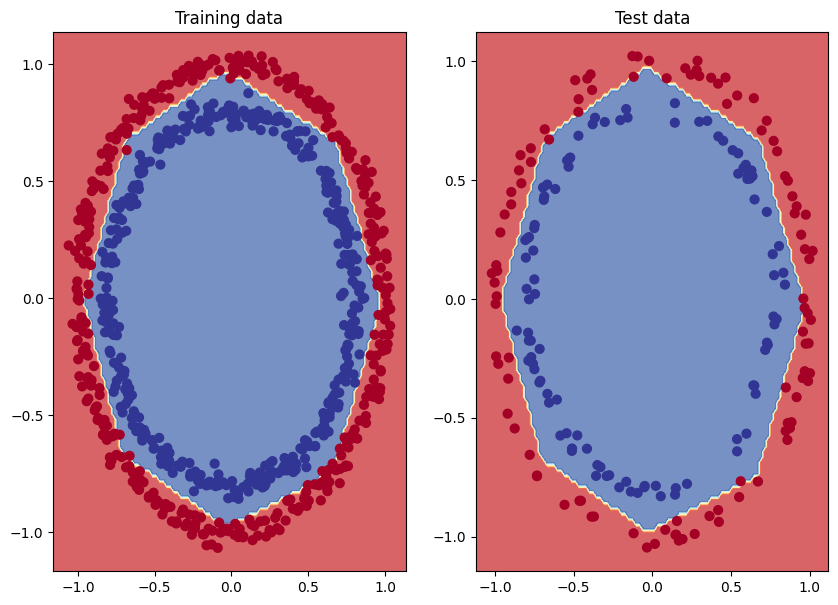

In [57]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.title("Training data")
plot_decision_boundary(model=model_10, X=x_train, Y=y_train)
plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model=model_10, X=x_test, Y=y_test)
plt.show()

## More calssification evaluation metrics

* Accuracy
* precision
* Recall
* F1-score
* Confusion matrix
* Classification report (fron sklearn)

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9850
Model loss on the test set: 0.0519995354115963
Model accuracy on the test set: 98.50%


How about confusion matrix?

In [59]:
# Create a confusuion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(x_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


In [60]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [61]:
y_preds[:10]

array([[9.9813390e-01],
       [9.9866420e-01],
       [9.7616374e-01],
       [9.9884254e-01],
       [6.9681056e-02],
       [4.0279359e-02],
       [9.8323673e-01],
       [8.4419339e-04],
       [9.9813753e-01],
       [2.0805597e-03]], dtype=float32)

looks like our predictions array has come out in
**prediction probability** form..the standard output form from the sigmoid (or softmax) activation functions

In [62]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
# create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

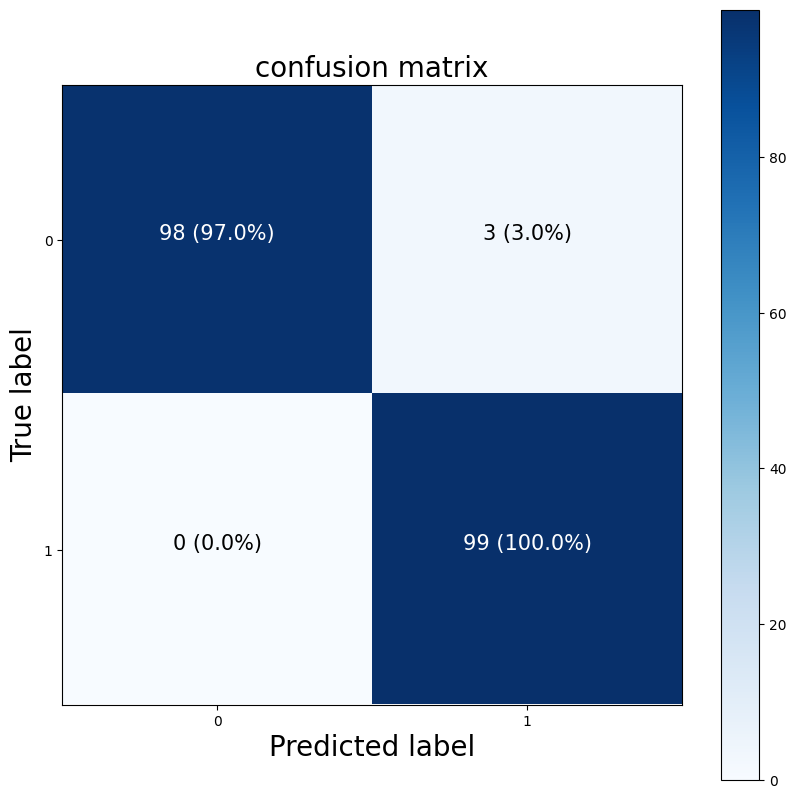

In [64]:
# The confusion matrix code is the remix of the sklearn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our comfusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Crete a classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title="confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j]>threshold else "black",
           size=15)

7/7 [==============================] - 0s 2ms/step


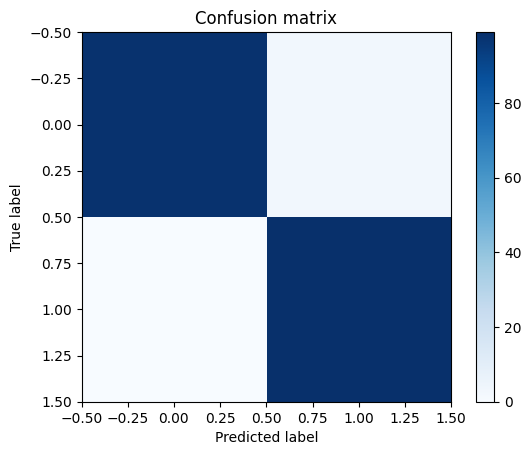

In [65]:
# prompt: plot confusion matrix using sklearn

from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.colorbar()
plt.show()


# Working with larger example (multiclass classification)

In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has been already sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [67]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [68]:
# Check the shape of single example
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

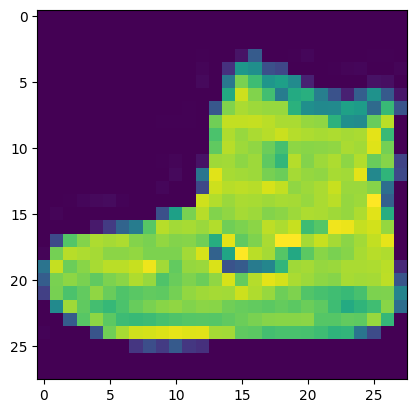

In [69]:
# Plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [70]:
# Check out sample label
train_labels[7]

2

In [71]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shrit/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shrit", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shrit/top')

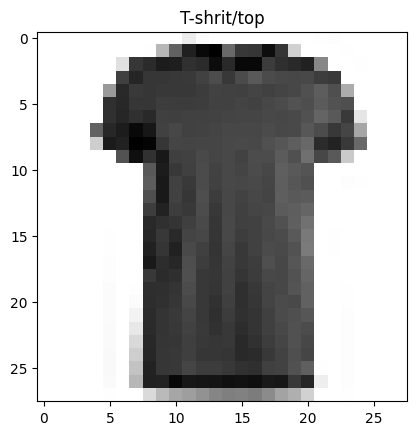

In [72]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

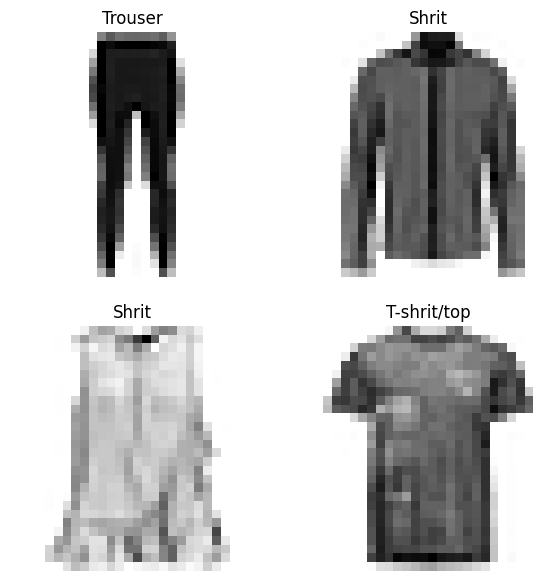

In [73]:
# Plot the multiple random images of  MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building multi class classification model

For our mult-class classification model, we can use a similar architecture to our binary classifiers, however we're going to tweak a few things
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class)
* Loss function = tf.keras.losses.CategoricalCrossentopy()
  * If your labels are one_hot encoded, use CategoricalCrossentropy()
  * If your labels are not one_hot encoded, then use SparseCategoricalCrossentropy()
* Output layer activation = softmax


In [74]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_11 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)

])

# 2. compile the model
model_11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3499 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3031 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy:

In [75]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_11 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)

])

# 2. compile the model
model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.5879 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy

In [76]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Check the min and max values
train_data.min(), train_data.max()

(0, 255)

In [78]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [79]:
# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [80]:
# Now our data is normalized, Let's build a model to find patterns in it

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6217 - accuracy: 0.3494 - val_loss: 1.1013 - val_accuracy: 0.5480
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8818 - accuracy: 0.6394 - val_loss: 0.8006 - val_accuracy: 0.6698
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7636 - accuracy: 0.6954 - val_loss: 0.7551 - val_accuracy: 0.6952
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7273 - accuracy: 0.7131 - val_loss: 0.7338 - val_accuracy: 0.7118
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7049 - accuracy: 0.7295 - val_loss: 0.7237 - val_accuracy: 0.7297
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6787 - accuracy: 0.7504 - val_loss: 0.6895 - val_accuracy: 0.7533
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6488 - accuracy: 0.7657 - val_loss: 0.7285 - val_accurac

<Axes: title={'center': 'Normalized data'}>

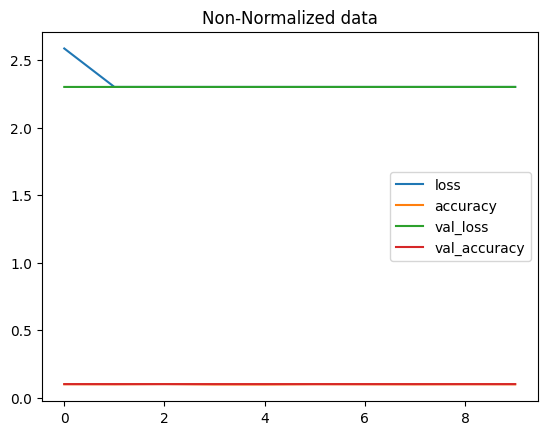

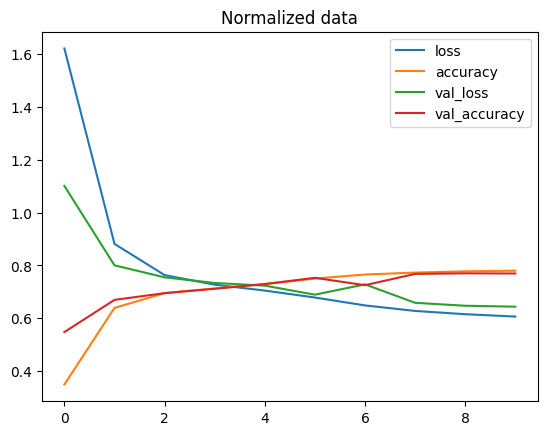

In [81]:
import pandas as pd
# Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")

# Plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate


In [82]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9179 - accuracy: 0.2862 - val_loss: 1.5829 - val_accuracy: 0.4177 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 14s 8ms/step - loss: 1.3370 - accuracy: 0.5259 - val_loss: 1.1461 - val_accuracy: 0.5571 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9735 - accuracy: 0.6483 - val_loss: 0.8725 - val_accuracy: 0.6928 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7977 - accuracy: 0.7203 - val_loss: 0.7655 - val_accuracy: 0.7283 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7253 - accuracy: 0.7438 - val_loss: 0.7157 - val_accuracy: 0.7456 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6835 - accuracy: 0.7572 - val_loss: 0.6845 - val_accuracy: 0.7591 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [==========

Text(0.5, 1.0, 'Finding ideal learning rate')

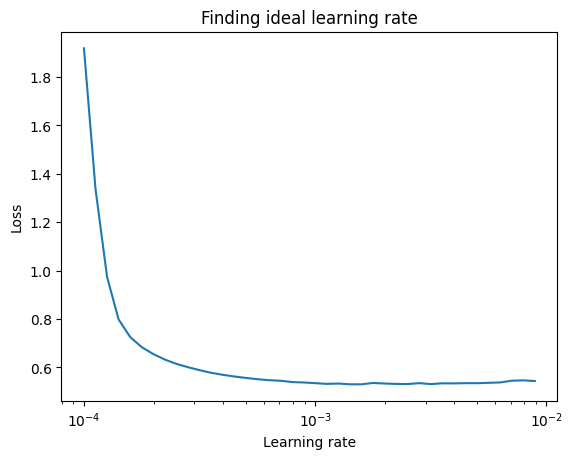

In [83]:
# Plot the learning rate decay curve
import matplotlib.pyplot as plt
import numpy as np

lrs =  1e-4 * 10 **(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

In [84]:
# Let's refit the model ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = ["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0739 - accuracy: 0.6135 - val_loss: 0.7228 - val_accuracy: 0.7546
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6337 - accuracy: 0.7810 - val_loss: 0.6482 - val_accuracy: 0.7803
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5665 - accuracy: 0.8032 - val_loss: 0.5736 - val_accuracy: 0.8003
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.8116 - val_loss: 0.5595 - val_accuracy: 0.8071
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5248 - accuracy: 0.8147 - val_loss: 0.5644 - val_accuracy: 0.8004
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5141 - accuracy: 0.8195 - val_loss: 0.5494 - val_accuracy: 0.8100
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5059 - accuracy: 0.8205 - val_loss: 0.5529 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classsification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Imrove its results (by training it longer or changing architecture)
* Save and export it for use in a application


In [115]:
# Create our confusion matrix
# The confusion matrix code is the remix of the sklearn's plot_confusion_matrix

import itertools


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our comfusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title="confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j]>threshold else "black",
            size=text_size)

In [116]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs = prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.81561899e-09, 1.08848603e-07, 5.13509974e-07, 9.57242719e-07,
        4.73688153e-04, 1.06997930e-01, 1.78082371e-06, 4.77689840e-02,
        1.91697944e-03, 8.42839003e-01],
       [3.77584511e-05, 1.33483695e-07, 8.65132511e-01, 1.07428271e-08,
        7.45476112e-02, 1.02324780e-30, 6.02767281e-02, 3.58993607e-17,
        5.16739738e-06, 2.66324343e-13],
       [2.67321752e-06, 9.99319255e-01, 1.83826764e-04, 4.69784631e-04,
        2.35380830e-05, 1.23727204e-20, 2.17649315e-07, 5.11854825e-09,
        1.06456659e-13, 5.76406762e-07],
       [2.18623430e-08, 9.99927580e-01, 1.05444960e-05, 2.22629387e-05,
        1.82827932e-06, 1.53823541e-18, 1.95124539e-09, 8.95464503e-09,
        1.27573517e-15, 3.77035358e-05],
       [1.08215339e-01, 1.36823603e-03, 3.00040215e-01, 1.39175765e-02,
        1.04428075e-01, 8.46453259e-17, 4.71115261e-01, 1.08978902e-07,
        9.15237702e-04, 1.19068462e-08]], dtype=float32)

In [117]:
len(y_probs)

10000

In [118]:
y_probs[0]

array([1.8156190e-09, 1.0884860e-07, 5.1350997e-07, 9.5724272e-07,
       4.7368815e-04, 1.0699793e-01, 1.7808237e-06, 4.7768984e-02,
       1.9169794e-03, 8.4283900e-01], dtype=float32)

In [119]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [120]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [121]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [122]:
confusion_matrix(y_true = test_labels, y_pred=y_preds)

array([[765,   5,  21,  69,   5,   4, 113,   0,  17,   1],
       [  2, 956,  11,  26,   3,   0,   2,   0,   0,   0],
       [ 25,  10, 713,   9, 159,   0,  77,   0,   7,   0],
       [ 52,  27,  10, 797,  52,   0,  54,   1,   6,   1],
       [  1,   3, 114,  17, 778,   0,  75,   0,   9,   3],
       [  0,   1,   0,   2,   0, 916,   0,  43,   6,  32],
       [146,   4, 129,  43, 157,   3, 498,   1,  19,   0],
       [  0,   0,   0,   0,   0,  44,   0, 890,   0,  66],
       [  5,   1,   5,  10,   8,   7,  29,   3, 930,   2],
       [  0,   2,   1,   0,   1,  13,   0,  32,   1, 950]])

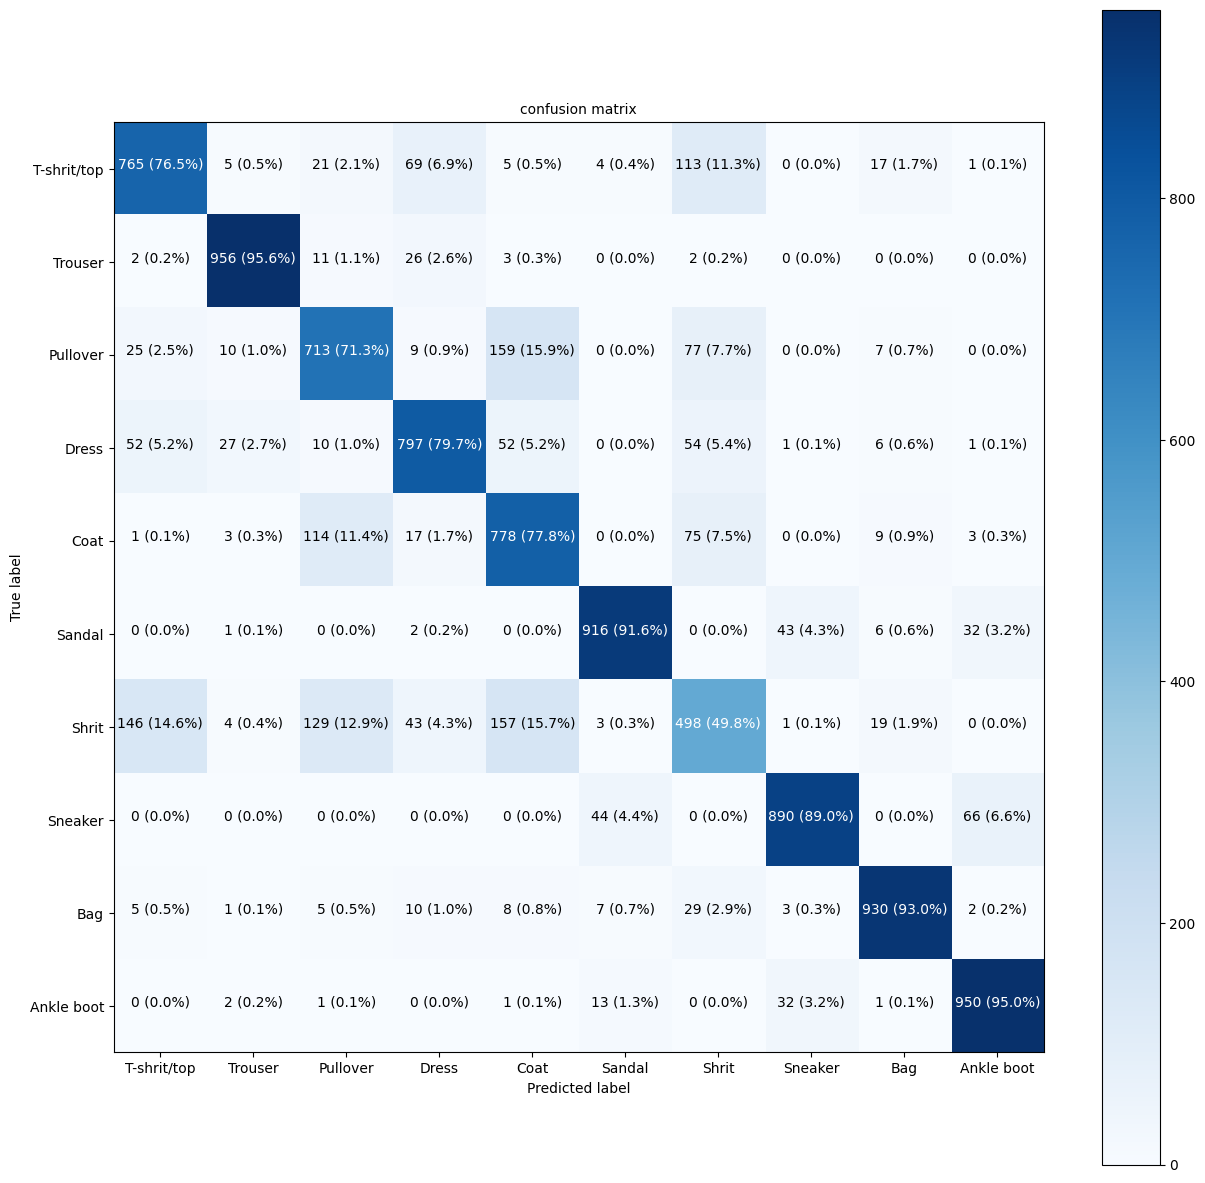

In [123]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

In [125]:
 test_labels.shape

(10000,)

In [114]:
y_preds.shape

(10000,)

How about we create a little functions for
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth & the predicted label

In [129]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth labels
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Let's create predicttions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/ true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 24ms/step


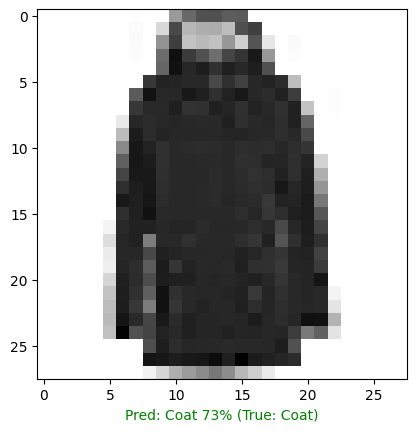

In [140]:
# Checkout random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

## What pattern our model exactly learning

In [141]:
# Find the layers of recent model
model_14.layers

In [145]:
# Exatrct a perticular layer
model_14.layers[1]

In [143]:
# Get the patterens of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.603258  ,  0.1387582 , -0.02637734,  0.36548606],
        [-0.47497606, -0.39158693, -0.7835414 ,  0.28470826],
        [ 0.29576793, -1.0610652 ,  0.20889583,  0.6896775 ],
        ...,
        [ 0.19810863, -0.02665317, -0.4396031 , -0.24787243],
        [ 0.39194945,  0.22404307, -0.23712929, -0.6359917 ],
        [ 0.20645136, -0.4273238 ,  0.2054687 , -0.16087484]],
       dtype=float32),
 (784, 4))

In [146]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now Let's checkout bias vector

In [148]:
#biases and biases shape
biases, biases.shape

(array([ 0.15373476,  0.50662845, -0.04329913,  0.4340341 ], dtype=float32),
 (4,))

Every nueron has a bias vector. Each of these is paired with a weights matrix.

The bias also initializes as zeros

The bias vector dictates how much the patterns with in the corresponding weights matrix should influence the next layers model_14.

In [149]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


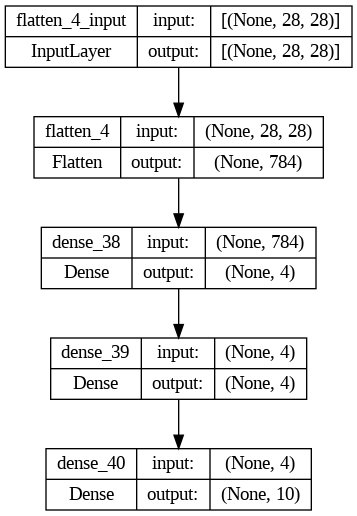

In [150]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each model
plot_model(model_14, show_shapes=True)